# 1.

In [112]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [46]:
# 1.Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.
data['reason'].value_counts()

print("Самая частая причина - " + data['reason'].value_counts().idxmax())

Самая частая причина - course


In [31]:
# 2. Найдите количество студентов, у родителей которых нет никакого образования.
((data['Medu'] == 0) & (data['Fedu'] == 0)).sum()

0

In [29]:
# 3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.
msStud = data[data['school']=="MS"]
msStud['age'].min()

17

In [32]:
# 4. Найдите количество студентов, имеющих нечетное число пропусков.
(data['absences'] % 2 == 1).sum()

41

In [44]:
# 5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.
fallInLove = data.loc[data['romantic'] == 'yes', 'G3'].mean()
depressed = data.loc[data['romantic'] == 'no', 'G3'].mean()
abs(round(depressed - fallInLove, 2))

1.26

In [79]:
f = data['activities'].mode()[0]
print("1. " + f)

s = data[data['activities'] == f]
s1 = s['absences'].mode()[0]
print("2. " + str(s1))

count = s[s['absences'] == s1].shape[0]
print("3. " + str(count))


1. yes
2. 0
3. 51


# 2

In [80]:
new_url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
data1 = pd.read_csv(new_url, on_bad_lines='skip', delimiter=',')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
# 1. Сколько мужчин / женщин находилось на борту?
data1['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [88]:
# 2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужщин 2-го класса?
raspr = data1['Pclass'].value_counts()
raspr_m = data1[data1['Sex'] == 'male']['Pclass'].value_counts()
raspr_w = data1[data1['Sex'] == 'female']['Pclass'].value_counts()
count_m = len(data1[(data1['Sex'] == 'male') & (data1['Pclass'] == 2)]['Sex'])

print("Общее распределение:" + str(raspr))
print("Распределение мужчины:" + str(raspr_m))
print("Распределение женщины:" + str(raspr_w))
print("Количество мужчин 2-ого класса:" + str(count_m))

Общее распределение:Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Распределение мужчины:Pclass
3    347
1    122
2    108
Name: count, dtype: int64
Распределение женщины:Pclass
3    144
1     94
2     76
Name: count, dtype: int64
Количество мужчин 2-ого класса:108


In [96]:
# 3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.
medianPay = data1['Fare'].median().round(2)
print("Медиана: " + str(medianPay))
stdPay = data1['Fare'].std().round(2)
print("Стандартное отклонение: " + str(stdPay))

Медиана: 14.45
Стандартное отклонение: 49.69


In [99]:
# 4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?
jun = data1[data1["Age"] < 30]["Survived"].mean()
sen = data1[data1["Age"] > 60]["Survived"].mean()
print("Молодые: " + str(jun))
print("Старше 60: " + str(sen))
print(jun>sen)

Молодые: 0.40625
Старше 60: 0.22727272727272727
True


In [102]:
# 5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?
men = data1[data1["Sex"] == "male"]["Survived"].mean()
women = data1[data1["Sex"] == "female"]["Survived"].mean()

print("Мужчины: " + str(men))
print("Женщины: " + str(women))
print(women > men)

Мужчины: 0.18890814558058924
Женщины: 0.7420382165605095
True


In [105]:
# 6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?
mens = data1[data1['Sex'] == 'male']
menNames = mens['Name']
menName = menNames.apply(lambda x: x.split(',')[1].split()[1])
count = menName.value_counts()
print(count.idxmax())

William


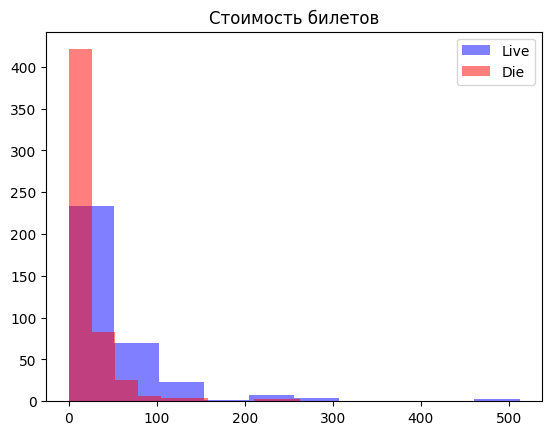

In [126]:
# 7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?
die = data1[data1['Survived'] == 0]
live = data1[data1['Survived'] == 1]
plt.hist(live['Fare'], alpha=0.5, color='b', label='Live')
plt.hist(die['Fare'], alpha=0.5, color='r', label='Die')
plt.title('Стоимость билетов')
plt.legend()

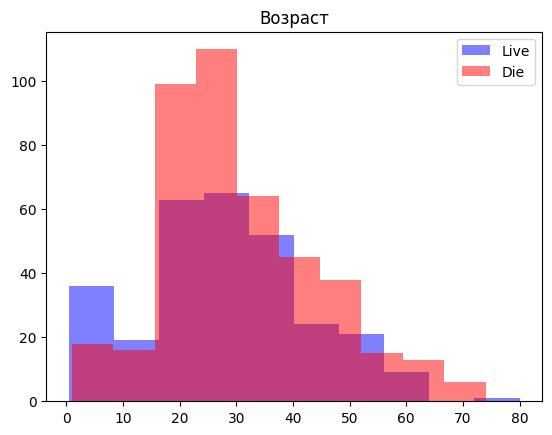

In [125]:
plt.hist(live['Age'].dropna(), alpha=0.5, color='b', label='Live')
plt.hist(die['Age'].dropna(), alpha=0.5, color='r', label='Die')
plt.title('Возраст')
plt.legend()

In [128]:
ageDie = die['Age'].mean()
ageLive = live['Age'].mean()
print("Возраст выживших: " + str(ageLive))
print("Возраст погибших: " + str(ageDie))
print(ageDie > ageLive)

Возраст выживших: 28.343689655172415
Возраст погибших: 30.62617924528302
True


In [140]:
# 8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?
men_40 =  data1[((data1['Pclass'] == 1) & (data1['Sex'] == 'male'))]['Age'].mean() > 40
women_40 = data1[((data1['Pclass'] == 1) & (data1['Sex'] == 'female'))]['Age'].mean() > 40
men_women = data1.groupby(['Sex', 'Pclass'])['Age'].mean()
human = data1.groupby("Pclass")["Age"].mean()

print("1. " + str(men_40))
print("2. " + str(women_40))
print("3. " + str(all(men_women['male'] > men_women['female'])))
print("4. " + str(human[1]>human[2]>human[3]))


1. True
2. False
3. True
4. True
